### **HW5 Problem 2: Due Date: Saturday, May 15, 5PM PST, on Gradescope.**


**Import necessary libraries.**

In [ ]:
# import libraries here

import matplotlib.pyplot as plt
import numpy as np

# 1. XOR

Given following samples, we will use multi-layer networks to approximate
the functions defined by the samples.

$x_1 = [1,1]^T, y_1 = +1$

$x_2 = [0,0]^T, y_2 = +1$

$x_3 = [1,0]^T, y_3 = -1$

$x_4 = [0,1]^T, y_4 = -1$


**(a) Visualize the samples in a 2 dimensional space. Indicate their classes, $y$.**


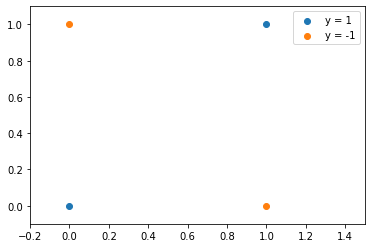

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.5
X = np.arange(xmin, xmax, 0.1)
ax.scatter([1, 0],[1,0], label= 'y = 1' )
ax.scatter([1, 0],[0,1], label='y = -1')
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
plt.plot()
ax.legend()

**(b) Implement a network to estimate the function that is generating these samples.
You need to choose the parameters of your model architecture such as number
of layers, number of neurons and the loss function. Implement your model
in python with Numpy without using Tensorflow/PyTorch or any other deep
learning framework. This will require you to derive update rules manually.
Comment on how you chose your parameters.**

In [ ]:
class XOR_NN():
    def __init__(self, data, labels, learning_rate):
        self.learning_rate = learning_rate
        #creating input layer O-->
        self.input_layer = data
        #     O--->
        #O--->
        #     O--->
        #creating 2 layers at hidden layer
        self.weights1 = np.random.rand(self.input_layer.shape[1],2) 
        self.weights2 = np.random.rand(2,1) 
        self.bias1 = 0
        self.bias2 = 0
        #  hidden  O--->
        #input O--->    pred out O-->
        #          O--->
        self.real_output = labels
        self.predicted_output = np.zeros(self.real_output.shape)
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x)) 
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    #forward prop
    # O----->O
    def prediction(self, input_array):
        self.input_layer = input_array
        #calculation of Layer_2
        self.z1 = np.dot(self.input_layer, self.weights1) + self.bias1
        self.hidden_layer  = self.sigmoid(self.z1)
        
        #calculation of Layer_3(Predicted_Output_layer)
        self.z2 = np.dot(self.hidden_layer, self.weights2)  + self.bias2
        self.predicted_output = self.sigmoid(self.z2)
        return self.predicted_output
    
    #back prop
    #O<-------O
    #used to find the error (MSE)
    def backpropagation(self):
        # Using loss function: MSE 
        #Chose MSE over Cross Entropy to make calculations simpler and avoid
        #log errors
        #derivative  of the MSE Function
        error = 2*(self.predicted_output - self.real_output)
        #derivative of the sigmoid function 
        d_sigmoid = self.sigmoid_derivative(self.predicted_output)
        weights2_update = np.dot(self.hidden_layer.T , error * d_sigmoid)
        
        weights1_update = np.dot(self.input_layer.T,  (np.dot(error * 
                        self.sigmoid_derivative(self.predicted_output), self.weights2.T) * 
                        self.sigmoid_derivative(self.hidden_layer)))
        
        #update Rule
        #update the weights with gradient descent
        self.weights2 -= weights2_update * self.learning_rate
        self.weights1 -= weights1_update * self.learning_rate
        
        return error
        
    def training(self, epochs):
        loss_value_list = []
        for i in range (0, epochs):
            self.prediction(self.input_layer)
            loss_value_list.append(sum(self.backpropagation()))
            
        loss_value_arr = np.array(loss_value_list)
        la = loss_value_arr
        epoch = np.array(range(1,epochs + 1))
        epoch = epoch.reshape(epochs,1)
        #plot the absolute value of the error
        plt.plot(epoch, abs(loss_value_arr))
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()


In [ ]:
train_data = np.array([[0,0],
                       [0,1],
                       [1,0],
                       [1,1]])

train_labels = np.array([[1,0,0,1]]).T

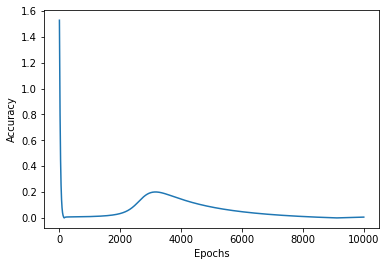

Test Prediction:[[0.7484537 ]
 [0.87199129]
 [0.19131933]
 [0.1913208 ]]


In [ ]:
epochs = 10000
learning_rate = 0.1
neural_network1 = XOR_NN(train_data, train_labels, learning_rate)
neural_network1.training(epochs)

#test coordinates prediction
test_coords = np.array([[1.0,1.0],[0.0,0.0],[1.0,0.0],[0.0,1.0]])
test_pred = neural_network1.prediction(test_coords)
print('Test Prediction:' + str(test_pred))

**(c) Visualize the final classification regions on the 2 dimensional space. Hint: Since
this will be a multi-layer network, the classification region won’t be a single line.
How can you visualize such regions?**

Such regions can be visualized through 3 decision boundaries determined by each neuron (total of 3 neurons, excluding the input).

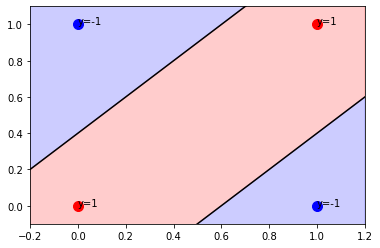

In [ ]:
boundary1 = np.linspace(-0.2, 1.2, 25)
plt.plot(boundary1,boundary1+0.4,c='black')
plt.plot(boundary1,boundary1-0.6,c='black')
plt.scatter(1,1,c='red',s=100)
plt.text(1,1, 'y=1')
plt.scatter(0,0,c='red',s=100)
plt.text(0,0, 'y=1')
plt.scatter(0,1,c = 'blue', s=100)
plt.text(0,1, 'y=-1')
plt.scatter(1,0,c= 'blue',s=100)
plt.text(1,0, 'y=-1')

plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1+3,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1-.6,y2=boundary1-2,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1-0.6,alpha=.2,color='red')
plt.xlim(-.2,1.2)
plt.ylim(-.1,1.1)
plt.show()

**(d) In real applications, we almost never work with data without noise. Now instead of using the above points, generate Gaussian random noise centered on these locations.**

$x_1\sim\mu_1=[1,1]^T,\Sigma_1=\Sigma\quad y_1=+1$

$x_2\sim\mu_1=[0,0]^T,\Sigma_2=\Sigma\quad y_2=+1$

$x_3\sim\mu_1=[1,0]^T,\Sigma_3=\Sigma\quad y_3=-1$

$x_4\sim\mu_1=[0,1]^T,\Sigma_4=\Sigma\quad y_4=-1$

$\Sigma=\begin{bmatrix}\sigma&0\\0&\sigma\end{bmatrix}$

**Generate Gaussian noise samples using the following functions, and add this
to your training data.**

`np.random.normal(loc = 0.0, scale = σ, size = train data.shape)`

**Re-train and visualize your classification regions for $\sigma = 0.5, 1, 2$. Comment on
your results.**

Test Prediction:
[[0.9323863 ]
 [0.55877171]
 [0.45543241]
 [0.42567428]]
For Points:
[[ 1.88202617  1.2000786 ]
 [ 0.48936899  1.1204466 ]
 [ 1.933779   -0.48863894]
 [ 0.47504421  0.9243214 ]]


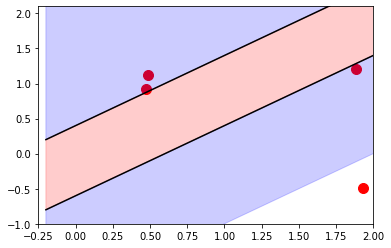

In [ ]:
#sigma = 0.5
np.random.seed(0)
test_coords = np.array([[1.0,1.0],[0.0,0.0],[1.0,0.0],[0.0,1.0]])
test_coords += np.random.normal(loc=0.0, scale = 0.5, size = test_coords.shape)

test_pred = neural_network1.prediction(test_coords)
print('Test Prediction:')
print(test_pred)
print('For Points:')
print(test_coords)

xs = [x[0] for x in test_coords]
ys = [x[1] for x in test_coords]
boundary1 = np.linspace(-0.2, 2.5, 100)
plt.plot(boundary1,boundary1+0.4,c='black')
plt.plot(boundary1,boundary1-0.6,c='black')
plt.scatter(xs,ys,c='red',s=100)


plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1+3,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1-.6,y2=boundary1-2,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1-0.6,alpha=.2,color='red')
plt.xlim(-0.25,2)
plt.ylim(-1,2.1)
plt.show()

Test Prediction:
[[0.96545973]
 [0.93985513]
 [0.70435582]
 [0.66199847]]
For Points:
[[ 2.76405235  1.40015721]
 [ 0.97873798  2.2408932 ]
 [ 2.86755799 -0.97727788]
 [ 0.95008842  0.84864279]]


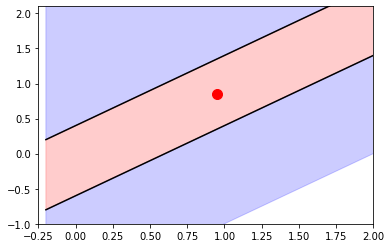

In [ ]:
#sigma = 1
np.random.seed(0)
test_coords = np.array([[1.0,1.0],[0.0,0.0],[1.0,0.0],[0.0,1.0]])
test_coords += np.random.normal(loc=0.0, scale = 1, size = test_coords.shape)

test_pred = neural_network1.prediction(test_coords)
print('Test Prediction:')
print(test_pred)
print('For Points:')
print(test_coords)

xs = [x[0] for x in test_coords]
ys = [x[1] for x in test_coords]
boundary1 = np.linspace(-0.2, 2.5, 100)
plt.plot(boundary1,boundary1+0.4,c='black')
plt.plot(boundary1,boundary1-0.6,c='black')
plt.scatter(xs,ys,c='red',s=100)


plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1+3,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1-.6,y2=boundary1-2,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1-0.6,alpha=.2,color='red')
plt.xlim(-0.25,2)
plt.ylim(-1,2.1)
plt.show()

Test Prediction:
[[0.97711322]
 [0.97727877]
 [0.90904438]
 [0.88803249]]
For Points:
[[ 4.52810469  1.80031442]
 [ 1.95747597  4.4817864 ]
 [ 4.73511598 -1.95455576]
 [ 1.90017684  0.69728558]]


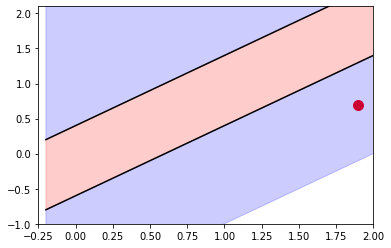

In [ ]:
#sigma = 2
np.random.seed(0)
test_coords = np.array([[1.0,1.0],[0.0,0.0],[1.0,0.0],[0.0,1.0]])
test_coords += np.random.normal(loc=0.0, scale = 2, size = test_coords.shape)

test_pred = neural_network1.prediction(test_coords)
print('Test Prediction:')
print(test_pred)
print('For Points:')
print(test_coords)

xs = [x[0] for x in test_coords]
ys = [x[1] for x in test_coords]
boundary1 = np.linspace(-0.2, 2.5, 100)
plt.plot(boundary1,boundary1+0.4,c='black')
plt.plot(boundary1,boundary1-0.6,c='black')
plt.scatter(xs,ys,c='red',s=100)


plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1+3,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1-.6,y2=boundary1-2,alpha=.2,color='blue')
plt.fill_between(x=boundary1,y1=boundary1+.4,y2=boundary1-0.6,alpha=.2,color='red')
plt.xlim(-0.25,2)
plt.ylim(-1,2.1)
plt.show()

Based on my results, it can be observed that even with noisy data, it is still possible for each point to be classified correctly. My attempt above for each regin was to plot the points to their corresponding boundaries.

# 2. Classification: (Logistic Regression)

Run the tutorial of Logistic Regression from
the link below which implements a MNIST written digit classification model.

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_logistic_regression/

This model takes hand-written digits as inputs and classifies the written digit in the
$[0,9]$ interval.
Explain all your code changes and report your results clearly.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

## Step 1: Load data

In [ ]:
#load training data
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#load test data set
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

## Step 2: Make data iterable

In [ ]:
batch_size = 100
#number of iterations
n_iters = 3000

#calculate no. of epochs
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [ ]:
#create training iterable object:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [ ]:
#create test iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## Step 3: Building Model

In [ ]:
# Same as linear regression! 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

## Step 4: Instantiate Model Class


*   Input dimension: Size of image 28 × 28 = 784
*   Output dimension: 10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]




In [ ]:
# Instantiate model class based on input and out dimensions
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

## Step 5: Instantiate Loss Class

In [ ]:
#using Cross Entropy Loss
#It does 2 things at the same time:
# -Computes softmax (logistic/softmax function) 
# -Computes cross entropy

criterion = nn.CrossEntropyLoss()  

## Step 7: Train Model

Process:



* Convert inputs/labels to tensors with gradients
* Clear gradient buffets
* Get output given inputs
* Get loss
* Get gradients w.r.t. parameters
* Update parameters using gradients
* parameters = parameters - learning_rate *parameters_gradients
* REPEAT




In [ ]:
def train_model(learning_rate, show_img = False):
  iter = 0
  acc_test = []
  acc_train = []
  wrong_images = []
  predicted_labels = []
  real_labels = []
  wrong = []
  img_list = []
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 
  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
          # Load images as Variable
          images = images.view(-1, 28*28).requires_grad_()
          labels = labels

          # Clear gradients w.r.t. parameters
          optimizer.zero_grad()

          # Forward pass to get output/logits
          outputs = model(images)

          # Calculate Loss: softmax --> cross entropy loss
          loss = criterion(outputs, labels)

          # Getting gradients w.r.t. parameters
          loss.backward()

          # Updating parameters
          optimizer.step()

          iter += 1

          if iter % 500 == 0:
              # Calculate Accuracy         
              correct_test = 0
              total_test = 0
              correct_train = 0
              total_train = 0
              
              # Iterate through test dataset
              for images, labels in test_loader:
                  # Load images to a Torch Variable
                  images = images.view(-1, 28*28).requires_grad_()

                  # Forward pass only to get logits/output
                  outputs = model(images)

                  # Get predictions from the maximum value
                  _, predicted = torch.max(outputs.data, 1)


                  # Total number of labels
                  total_test += labels.size(0)

                  # Total correct predictions
                  correct_test += (predicted == labels).sum()
                  #print('loop check')
                  
                  if (predicted[0] != labels[0]):
                    wrong_img = images[0].detach().numpy()
                    wrong_img = np.reshape(wrong_img, (28,28))
      
                    wrong.append((wrong_img, labels[0].item(),predicted[0].item()))

                 

              accuracy_test = 100 * correct_test / total_test
              acc_test.append(accuracy_test)

              #print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy_test))
              for images, labels in train_loader:
                  # Load images to a Torch Variable
                  images = images.view(-1, 28*28).requires_grad_()

                  # Forward pass only to get logits/output
                  outputs = model(images)

                  # Get predictions from the maximum value
                  _, predicted = torch.max(outputs.data, 1)

                  # Total number of labels
                  total_train += labels.size(0)

                  # Total correct predictions
                  correct_train += (predicted == labels).sum()

              accuracy_train = 100 * correct_train / total_train
              acc_train.append(accuracy_train)

              # Print Loss
              #print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy_train))
  #These code changes were made to plot the graphs or display the images for the corresponding
  #question part. 
  if(show_img == False):
    print(acc_test,acc_train)
    epochs = np.array([0,1,2,3,4,5])
    plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
    plt.plot(epochs, acc_test, 'b', label='Test Accuracy')
    plt.title('Training and Test Accuracy with Learning Rate = ' + str(learning_rate))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

  if(show_img == True):
    for i in range(0,10):
      for image_tuple in wrong:
        if image_tuple[1] == i:
          img_list.append(image_tuple[0])
          predicted_labels.append(image_tuple[2])
          real_labels.append(i)
          break

    for j in range(len(img_list)):
      plt.imshow(img_list[j], cmap='gray')
      print("Predicted:" + str(predicted_labels[j]) + "Actual:" + str(real_labels[j]))
      plt.show()
      




**(a) Calculate the training accuracy and test accuracy at the end of every epoch and
plot them w.r.t. epochs for learning rates 0.00001, 0.0001, 0.001, and 0.1. Include
all plots in your report. Write your observation on training and test accuracy
with respect to learning rate.**

Based on the following plots, it can be concluded that as the learning rate increases with the maximum value at the learning rate 0.1; the accuracies for both the training and test datasets increase. However, there is a slightly higher accuracy for the test data. A possibility for this may be due to overfitting caused by the training data since it is not shuffled and may not be as generalized as the test dataset.

[tensor(12.7600), tensor(13.3100), tensor(14.0200), tensor(14.5700), tensor(15.2200), tensor(15.7200)] [tensor(12.4467), tensor(12.9433), tensor(13.5000), tensor(14.0650), tensor(14.6783), tensor(15.3117)]


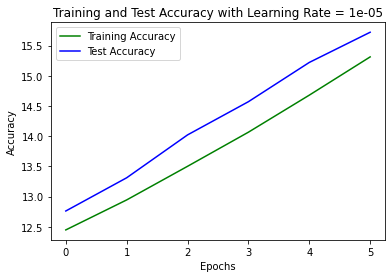

In [ ]:
train_model(learning_rate=0.00001)

[tensor(23.2800), tensor(32.1600), tensor(41.4100), tensor(48.4900), tensor(54.4700), tensor(58.6600)] [tensor(22.6683), tensor(31.5200), tensor(40.6917), tensor(47.6517), tensor(53.6033), tensor(58.0700)]


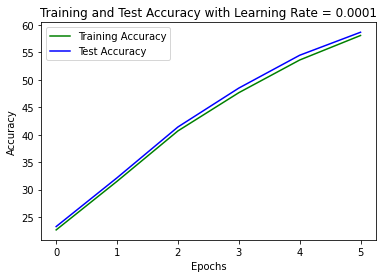

In [ ]:
train_model(learning_rate=0.0001)

[tensor(74.0500), tensor(77.9800), tensor(80.2500), tensor(81.4600), tensor(82.5800), tensor(83.2500)] [tensor(73.1483), tensor(77.0533), tensor(79.1967), tensor(80.5767), tensor(81.5883), tensor(82.2367)]


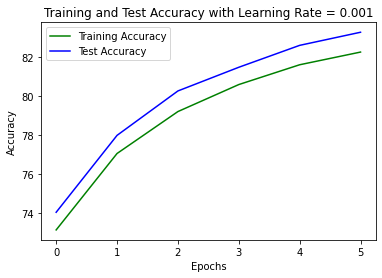

In [ ]:
train_model(learning_rate=0.001)

[tensor(89.9800), tensor(90.8800), tensor(91.5100), tensor(91.9300), tensor(91.8100), tensor(91.7700)] [tensor(89.2333), tensor(90.3150), tensor(90.8950), tensor(91.3033), tensor(91.5067), tensor(91.6650)]


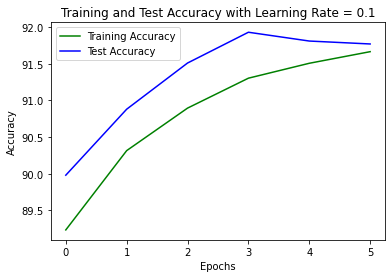

In [ ]:
train_model(learning_rate=0.1)

**(b) For each of the output classes, identify 10 misclassified test samples for your
best model that you have trained in part (a) and visualize them in your report. Why do you think they got misclassified?**

For this problem, the images that were displayed showed all classes except class 8 for the actual label. This may be due to the lack of misprediction on actual '8' digits. However, the other images may have been misclassified due to close similarities such as the misclassified 9 class image where it shows similarities to 4 pixel-wise hence the prediction of 4. Other reasons for misprediction may be due to the lack of sampling for a specific digit from the training dataset which may underfit the model and mispredict images in the test dataset.

NOTE: This question is very ambigous so I printed ten images, where each image pertains to one of the actual class.

Predicted:6Actual:0


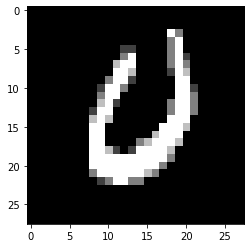

Predicted:8Actual:1


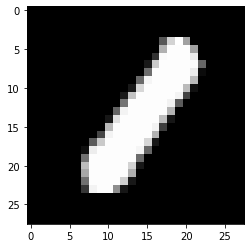

Predicted:8Actual:2


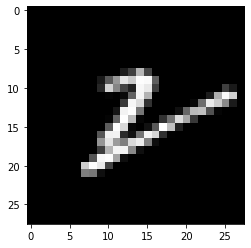

Predicted:2Actual:3


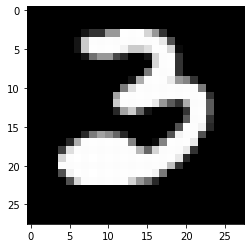

Predicted:6Actual:4


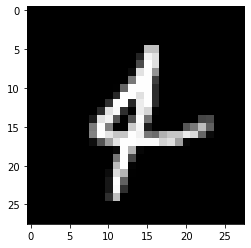

Predicted:8Actual:5


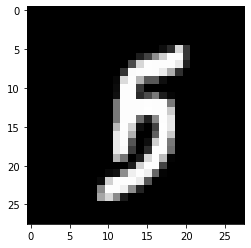

Predicted:4Actual:6


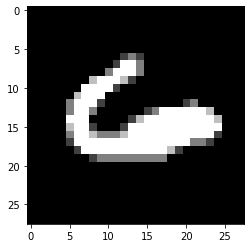

Predicted:1Actual:7


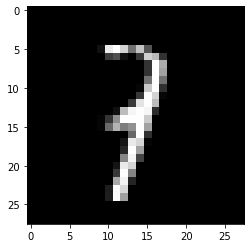

Predicted:5Actual:8


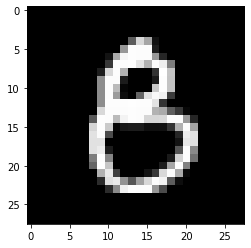

Predicted:4Actual:9


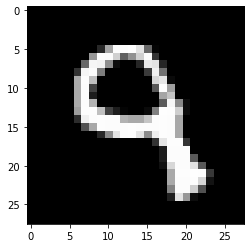

In [ ]:
train_model(learning_rate=0.1, show_img = True)

**(c) Now we are going to change the model such that it will be classifying even-odd
numbers instead of digits. You are expected to use same number of layers as
the original network, which means you need to change the number of neurons.
Additionally, you need to process the input data such that labels correspond to
even-odd instead of digits $[0,9]$.**

In [ ]:
# Instantiate model class based on input and out dimensions
input_dim = 28*28
output_dim = 2

model = LogisticRegressionModel(input_dim, output_dim)

In [ ]:
#Preprocessing the data to set the even and odd target labels in the dataset for
#both training and test 
for i in range(10):
  idx = (train_dataset.targets==i)
  if (i == 0) or ((i % 2) == 0):
    train_dataset.targets[idx] = 0

  else:
    train_dataset.targets[idx] = 1

for j in range(10):
  indx = (test_dataset.targets==j)
  if (j == 0) or ((j % 2) == 0):
    test_dataset.targets[indx] = 0

  else:
    test_dataset.targets[indx] = 1

[tensor(89.3500), tensor(89.5300), tensor(89.6000), tensor(89.4600), tensor(89.3100), tensor(89.8300)] [tensor(89.2983), tensor(89.5200), tensor(89.4800), tensor(89.2883), tensor(89.1983), tensor(89.8483)]


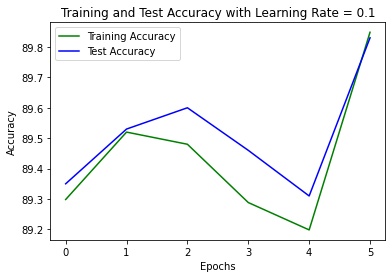

In [ ]:
train_model(learning_rate=0.1, show_img = False)

Misclassified images: (Grouped by Actual Class
Even Class:


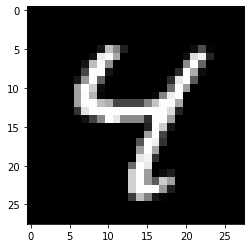

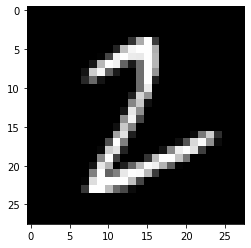

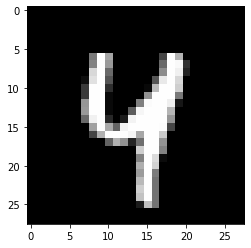

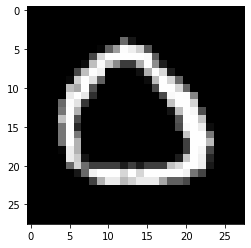

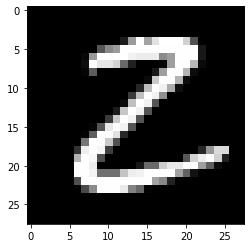

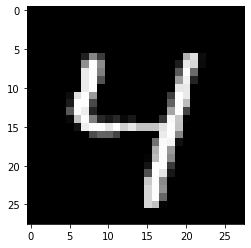

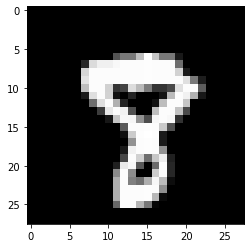

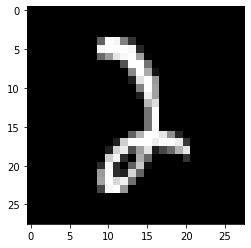

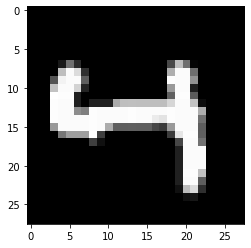

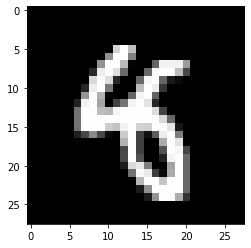

Odd Class:


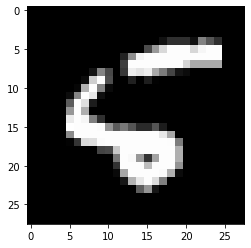

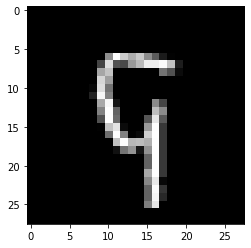

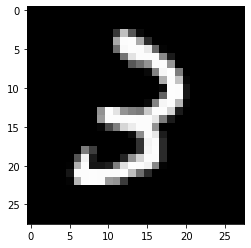

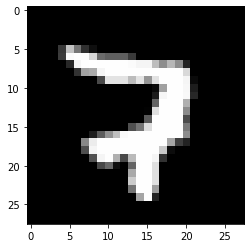

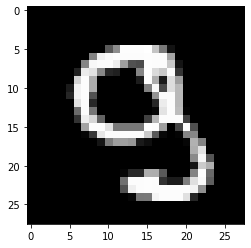

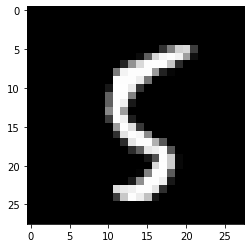

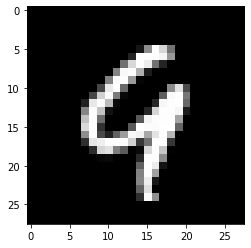

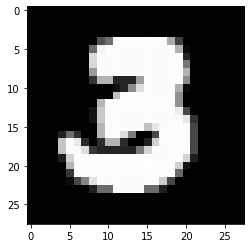

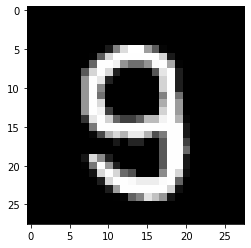

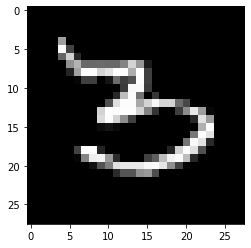

In [ ]:
misclassified = [[],[]]

for images, labels in test_loader:
  images = images.view(-1, 28*28).requires_grad_()
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  for i in range(len(predicted)):
    #instead of rewriting model, use this to predict 
    if (predicted[i] != labels[i]):
      wrng_img = images[i].detach().numpy()
      wrng_img = np.reshape(wrng_img, (28, 28))
      misclassified[labels[i]].append(wrng_img)

print('Misclassified images: (Grouped by Actual Class')
print('Even Class:')
for i in range(10):
  plt.imshow(misclassified[0][i], cmap='gray')
  plt.show()
print('Odd Class:')
for i in range(10):
  plt.imshow(misclassified[1][i], cmap='gray')
  plt.show()

# 3. Classification: (CNN)

Go through the tutorial from the link below which implements MNIST written digit classification using Convolutions Networks.

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/

There are three different CNN Models given on the
link.

- **Model A:** 2 Convolutional (Same Padding) Layers, 2 Max Pooling Layers, 1
Fully Connected Layer
- **Model B:** 2 Convolutional Layers (Same Padding), 2 Avg Pooling Layers, and
1 Fully Connected Layer
- **Model C:** 2 Convolutional Layers (Valid Padding), 2 Max Pooling Layers, 1
Fully Connected Layer

Train the same models on the CIFAR10 Dataset (https://www.cs.toronto.edu/~kriz/cifar.html) for Leaky ReLU activation instead of ReLU activation function. Explain all your code changes and report your results clearly.

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.CIFAR10(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.CIFAR10(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())





Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
#Model A Class Definition

class CNNModel_A(nn.Module):
    def __init__(self):
        super(CNNModel_A, self).__init__()

        # Convolution 1
        # code changes: changed the in channels to account for RGB channels
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        #code changes: changed to Leaky ReLu
        self.relu1 = nn.LeakyReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.LeakyReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        #changed fully connected input size to 2048
        self.fc1 = nn.Linear(2048, 10) 

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2 
        out = self.maxpool2(out)

        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

In [ ]:
#general function to return accuracies for plotting later
def train_model(model, num_epochs):
  iter = 0
  train_accuracies = []
  test_accuracies = []
  for epoch in range(num_epochs):
      for i, (images, labels) in enumerate(train_loader):
          # Load images
          images = images.requires_grad_()

          # Clear gradients w.r.t. parameters
          optimizer.zero_grad()

          # Forward pass to get output/logits
          outputs = model(images)

          # Calculate Loss: softmax --> cross entropy loss
          loss = criterion(outputs, labels)

          # Getting gradients w.r.t. parameters
          loss.backward()

          # Updating parameters
          optimizer.step()

          iter += 1

      # Calculate Accuracy
      # Train Accuracy
      train_correct = 0
      train_total = 0
      # Iterate through test dataset
      for images, labels in train_loader:
          # Load images
          images = images.requires_grad_()

          # Forward pass only to get logits/output
          outputs = model(images)

          # Get predictions from the maximum value
          _, predicted = torch.max(outputs.data, 1)

          # Total number of labels
          train_total += labels.size(0)

          # Total correct predictions
          train_correct += (predicted == labels).sum()

      train_accuracy = 100 * train_correct / train_total
      train_accuracies.append(train_accuracy)

      # Test Accuracy
      test_correct = 0
      test_total = 0
      # Iterate through test dataset
      for images, labels in test_loader:
          # Load images
          images = images.requires_grad_()

          # Forward pass only to get logits/output
          outputs = model(images)

          # Get predictions from the maximum value
          _, predicted = torch.max(outputs.data, 1)

          # Total number of labels
          test_total += labels.size(0)

          # Total correct predictions
          test_correct += (predicted == labels).sum()

      test_accuracy = 100 * test_correct / test_total
      test_accuracies.append(test_accuracy)

      # Print Loss
      print('Epoch: {}. Loss: {}. Train Accuracy: {}. Test Accuracy: {}'.format(epoch, loss.item(), train_accuracy, test_accuracy))
  return np.array(train_accuracies), np.array(test_accuracies)

# Model A, Batch = 10 

In [ ]:
batch_size = 10
#override epochs from Ekta Email 
#num_epochs = 3

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_A10 = CNNModel_A()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_A10.parameters(), lr=learning_rate)

train_accuracies_A10, test_accuracies_10 = train_model(model_A10, 3)

Epoch: 0. Loss: 1.2120285034179688. Train Accuracy: 45.9379997253418. Test Accuracy: 45.349998474121094
Epoch: 1. Loss: 1.450771450996399. Train Accuracy: 59.52399826049805. Test Accuracy: 57.459999084472656
Epoch: 2. Loss: 1.704037070274353. Train Accuracy: 62.7400016784668. Test Accuracy: 60.290000915527344


# Model A, Batch = 25

In [ ]:
batch_size = 25
#override epochs from Ekta Email 
#num_epochs = 3

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_A25 = CNNModel_A()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_A25.parameters(), lr=learning_rate)

train_accuracies_A25, test_accuracies_A25 = train_model(model_A25, 3)

Epoch: 0. Loss: 1.5266872644424438. Train Accuracy: 43.801998138427734. Test Accuracy: 43.63999938964844
Epoch: 1. Loss: 2.1031999588012695. Train Accuracy: 50.56800079345703. Test Accuracy: 50.29999923706055
Epoch: 2. Loss: 1.845645785331726. Train Accuracy: 53.05400085449219. Test Accuracy: 52.209999084472656


# Model A, Batch = 50

In [ ]:
batch_size = 50
#override epochs from Ekta Email 
#num_epochs = 3

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_A50 = CNNModel_A()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_A50.parameters(), lr=learning_rate)

train_accuracies_A50, test_accuracies_A50 = train_model(model_A50, 3)

Epoch: 0. Loss: 1.709645390510559. Train Accuracy: 38.194000244140625. Test Accuracy: 38.41999816894531
Epoch: 1. Loss: 1.564854621887207. Train Accuracy: 45.46200180053711. Test Accuracy: 45.43000030517578
Epoch: 2. Loss: 1.460034966468811. Train Accuracy: 48.52399826049805. Test Accuracy: 48.599998474121094


# Model B

In [ ]:
class CNNModel_B(nn.Module):
    def __init__(self):
        super(CNNModel_B, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.LeakyReLU()

        # Average pool 1
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.LeakyReLU()

        # Average pool 2
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 8 * 8, 10) 

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Average pool 1
        out = self.avgpool1(out)

        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2 
        out = self.avgpool2(out)

        # Resize
        # Original size: (100, 32, 8, 8)
        # out.size(0): 100
        # New out size: (100, 32*8*8)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

# Model B, Batch = 10

In [ ]:
batch_size = 10


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_B10 = CNNModel_B()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_B10.parameters(), lr=learning_rate)

train_accuracies_B10, test_accuracies_B10 = train_model(model_B10,3)

Epoch: 0. Loss: 1.4985358715057373. Train Accuracy: 39.63800048828125. Test Accuracy: 40.150001525878906
Epoch: 1. Loss: 1.2711098194122314. Train Accuracy: 51.20399856567383. Test Accuracy: 50.83000183105469
Epoch: 2. Loss: 1.2623639106750488. Train Accuracy: 53.79999923706055. Test Accuracy: 52.93000030517578


# Model B, Batch = 25

In [ ]:
batch_size = 25


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_B25 = CNNModel_B()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_B25.parameters(), lr=learning_rate)

train_accuracies_B25, test_accuracies_B25 = train_model(model_B25,3)

Epoch: 0. Loss: 1.8180433511734009. Train Accuracy: 37.53799819946289. Test Accuracy: 38.20000076293945
Epoch: 1. Loss: 1.6416265964508057. Train Accuracy: 46.928001403808594. Test Accuracy: 46.88999938964844
Epoch: 2. Loss: 1.5035698413848877. Train Accuracy: 49.75400161743164. Test Accuracy: 49.4900016784668


# Model B, Batch = 50 

In [ ]:
batch_size = 50


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_B50 = CNNModel_B()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_B50.parameters(), lr=learning_rate)

train_accuracies_B50, test_accuracies_B50 = train_model(model_B50,3)

Epoch: 0. Loss: 1.906408429145813. Train Accuracy: 34.18600082397461. Test Accuracy: 34.720001220703125
Epoch: 1. Loss: 1.7723866701126099. Train Accuracy: 40.61199951171875. Test Accuracy: 40.84000015258789
Epoch: 2. Loss: 1.2829655408859253. Train Accuracy: 44.987998962402344. Test Accuracy: 45.209999084472656


# Model C

In [ ]:
class CNNModel_C(nn.Module):
    def __init__(self):
        super(CNNModel_C, self).__init__()

        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.LeakyReLU()

        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.LeakyReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(32 * 5 * 5, 10) 

    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2 
        out = self.maxpool2(out)

        # Resize
        # Original size: (100, 32, 8, 8)
        # out.size(0): 100
        # New out size: (100, 32*8*8)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out

#Model C, Batch = 10 

In [ ]:
batch_size = 10


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_C10 = CNNModel_C()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_C10.parameters(), lr=learning_rate)

train_accuracies_C10, test_accuracies_C10 = train_model(model_C10, 3)

Epoch: 0. Loss: 1.8055843114852905. Train Accuracy: 46.56399917602539. Test Accuracy: 46.90999984741211
Epoch: 1. Loss: 1.4135035276412964. Train Accuracy: 53.54600143432617. Test Accuracy: 52.650001525878906
Epoch: 2. Loss: 1.2234938144683838. Train Accuracy: 58.40399932861328. Test Accuracy: 56.599998474121094


# Model C, Batch = 25

In [ ]:
batch_size = 25


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_C25 = CNNModel_C()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_C25.parameters(), lr=learning_rate)

train_accuracies_C25, test_accuracies_C25 = train_model(model_C25, 3)

Epoch: 0. Loss: 1.8806090354919434. Train Accuracy: 33.99599838256836. Test Accuracy: 34.130001068115234
Epoch: 1. Loss: 1.1517422199249268. Train Accuracy: 46.242000579833984. Test Accuracy: 46.04999923706055
Epoch: 2. Loss: 1.4778820276260376. Train Accuracy: 50.80400085449219. Test Accuracy: 50.08000183105469


Model C, Batch = 50 

In [ ]:
batch_size = 50


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

model_C50 = CNNModel_C()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model_C50.parameters(), lr=learning_rate)

train_accuracies_C50, test_accuracies_C50 = train_model(model_C50, 3)

Epoch: 0. Loss: 1.8669360876083374. Train Accuracy: 31.285999298095703. Test Accuracy: 31.530000686645508
Epoch: 1. Loss: 1.5047398805618286. Train Accuracy: 41.47600173950195. Test Accuracy: 41.91999816894531
Epoch: 2. Loss: 1.3048851490020752. Train Accuracy: 45.95600128173828. Test Accuracy: 45.560001373291016


**(a) Plot training and testing accuracy for all models with respect to each epoch for batch
sizes 10, 25 and 50. Write observations in your report.**

In [ ]:
import matplotlib.pyplot as plt

def plot_models(test_acc, train_acc):
  epochs = [0,1,2]
  plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
  plt.plot(epochs, test_acc, 'b', label='Test Accuracy')
  plt.title('Training and Test Accuracy with Learning Rate = ' + str(learning_rate))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Model A
Batch = 10


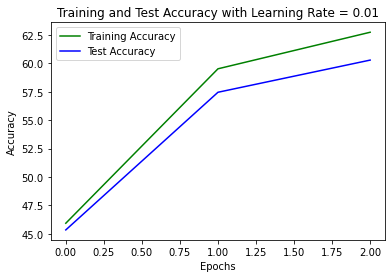

Batch = 25


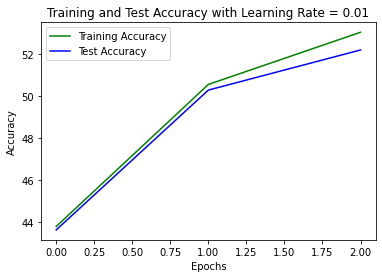

Batch = 50


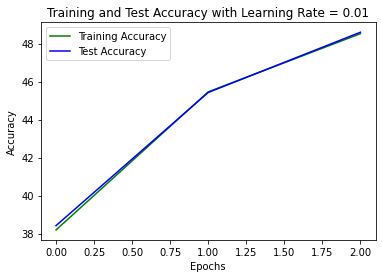

Model B
Batch = 10


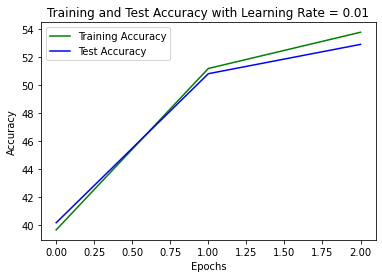

Batch = 25


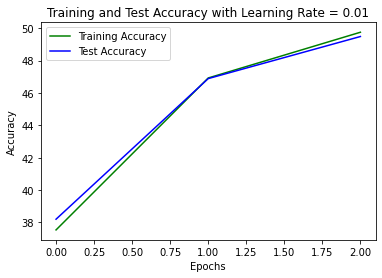

Batch = 50


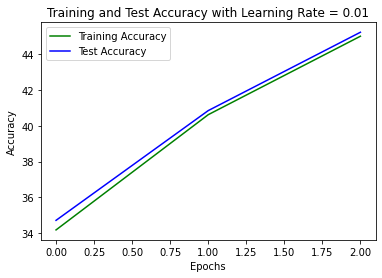

Model C
Batch = 10


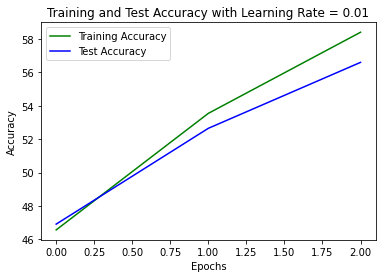

Batch = 25


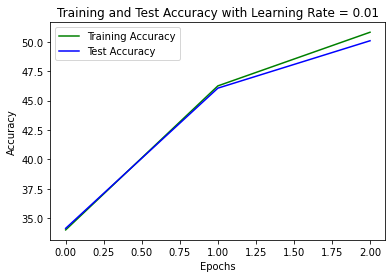

Batch = 50


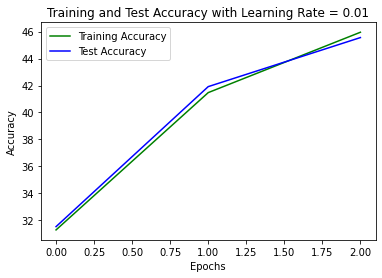

In [ ]:
print("Model A")
print("Batch = 10")
plot_models(test_accuracies_10,train_accuracies_A10)
print("Batch = 25")
plot_models(test_accuracies_A25,train_accuracies_A25)
print("Batch = 50")
plot_models(test_accuracies_A50,train_accuracies_A50)

print("Model B")
print("Batch = 10")
plot_models(test_accuracies_B10,train_accuracies_B10)
print("Batch = 25")
plot_models(test_accuracies_B25,train_accuracies_B25)
print("Batch = 50")
plot_models(test_accuracies_B50,train_accuracies_B50)

print("Model C")
print("Batch = 10")
plot_models(test_accuracies_C10,train_accuracies_C10)
print("Batch = 25")
plot_models(test_accuracies_C25,train_accuracies_C25)
print("Batch = 50")
plot_models(test_accuracies_C50,train_accuracies_C50)

Of all the above plots, the plot for Model A, Batch =10 returns the highest accuracy, with models B and C following near the same performances with respect to the batch sizes. Both models B and C still fall behind Model A by an average of about 5%. 

**(b) For each of the output classes, identify 10 misclassified test samples for your
best model that you have trained in part (a) and visualize them in your report. Why do you think they got misclassified?**


The following samples may have been misclassified due to their over-pixelated quality that distances their resemblance to other correctly classified images from the class. Additionally, for each class there are various forms for that specific class such as class 3 which can easily be mispredicted for class 4 with such near similarities of the cats and horses yet very unclear pixel quality. For class 0, the first image cannot even be predicted to be an airplane since it looks more like a dinosaur to me.

Misclassified images grouped by actual label:
Class #0


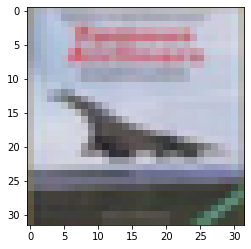

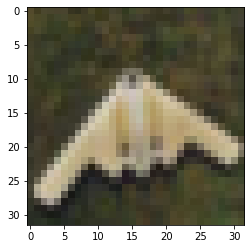

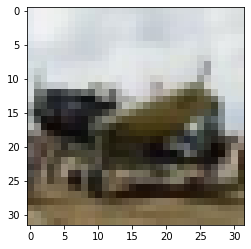

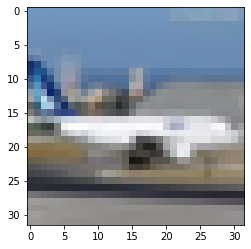

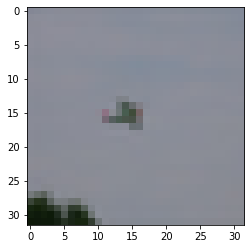

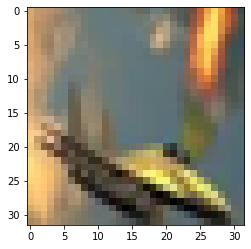

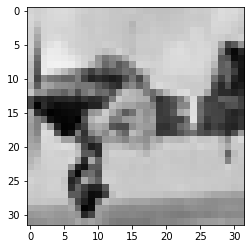

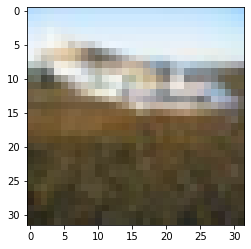

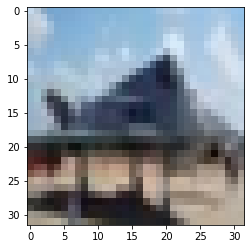

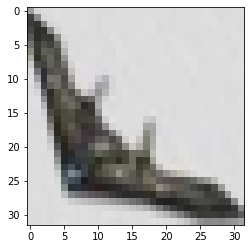

Class #1


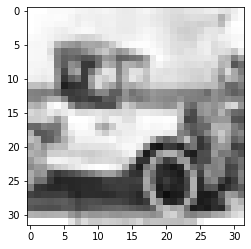

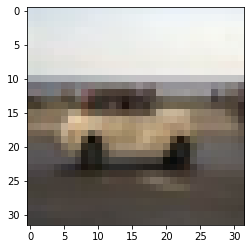

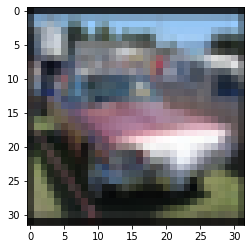

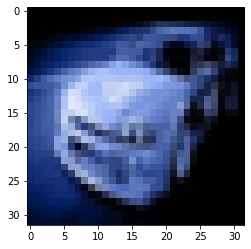

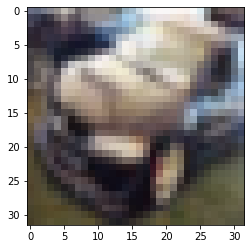

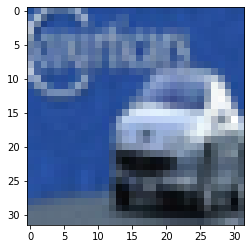

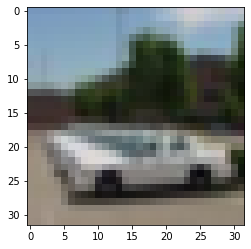

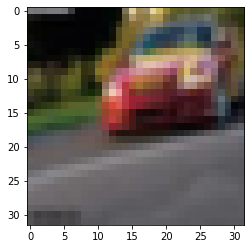

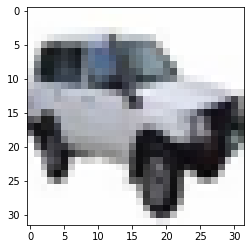

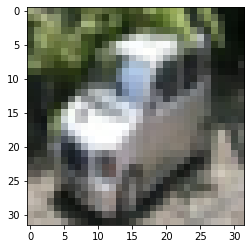

Class #2


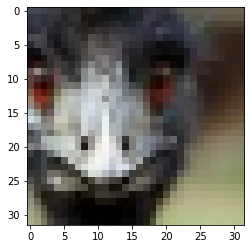

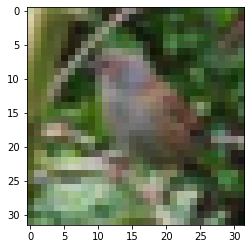

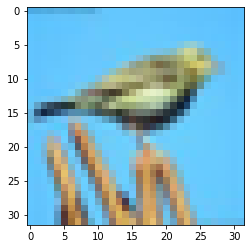

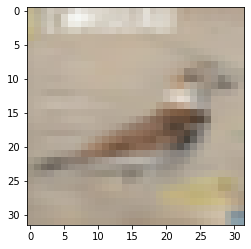

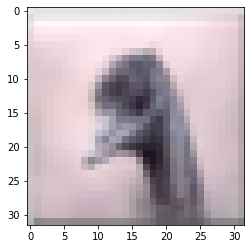

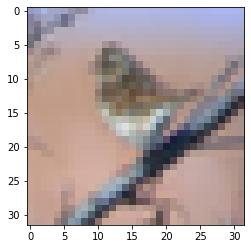

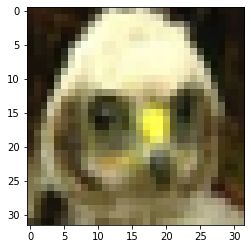

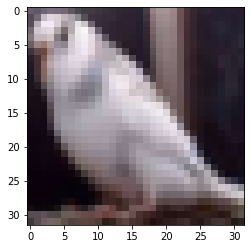

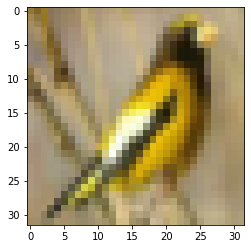

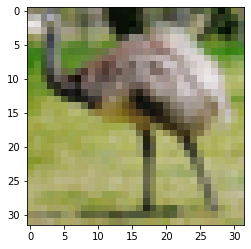

Class #3


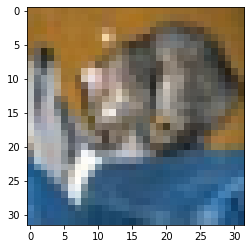

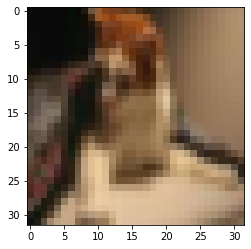

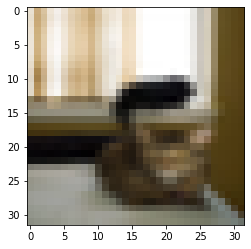

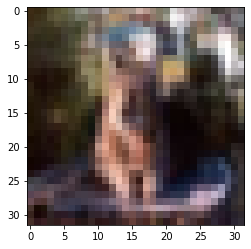

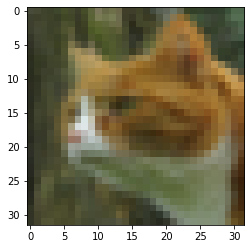

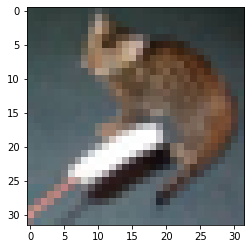

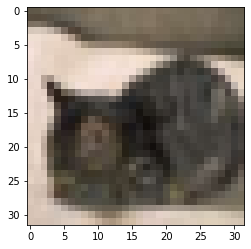

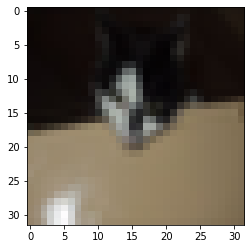

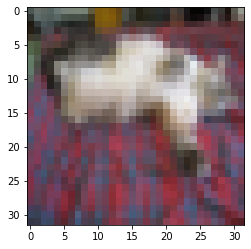

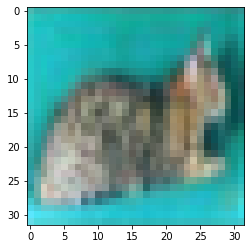

Class #4


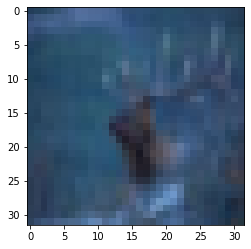

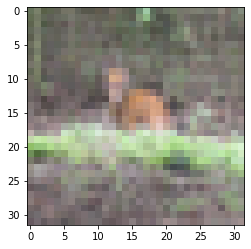

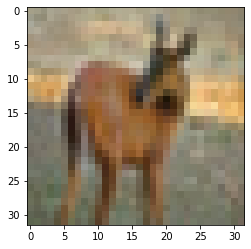

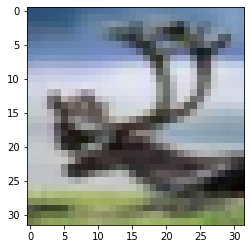

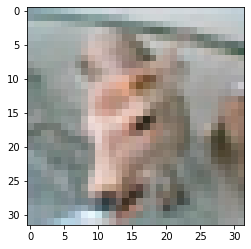

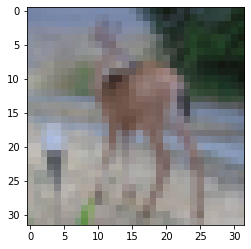

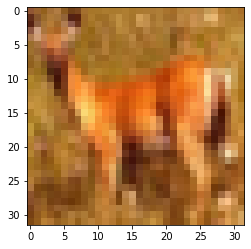

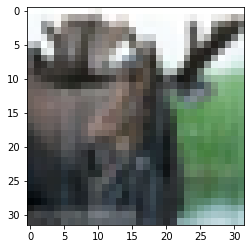

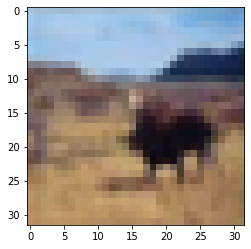

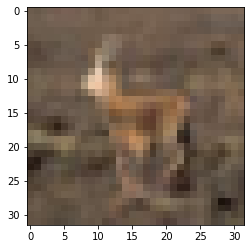

Class #5


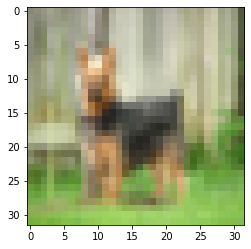

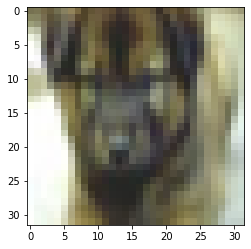

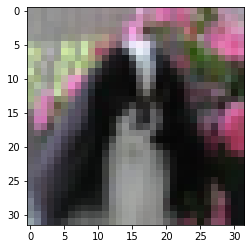

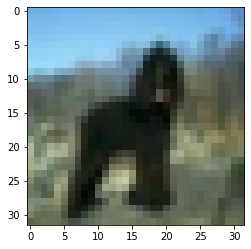

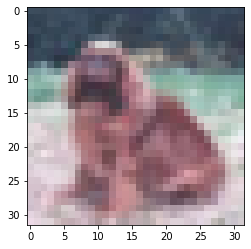

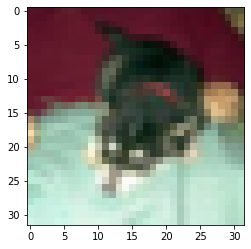

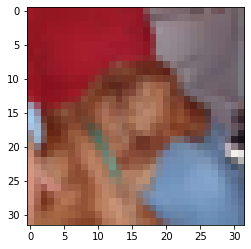

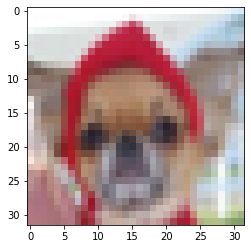

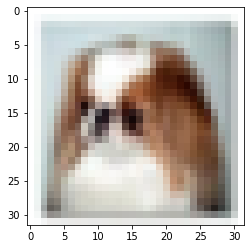

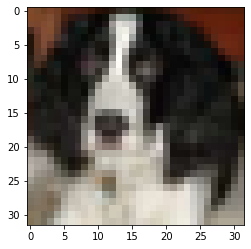

Class #6


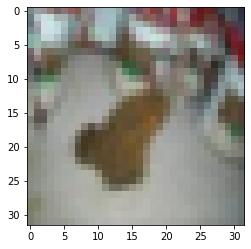

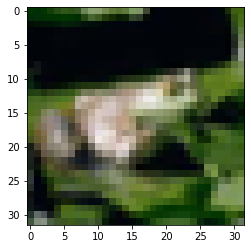

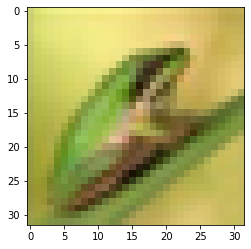

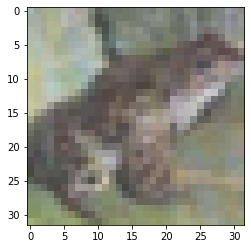

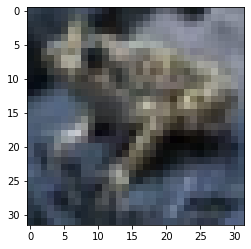

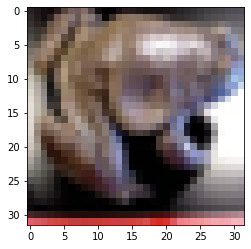

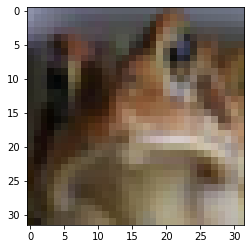

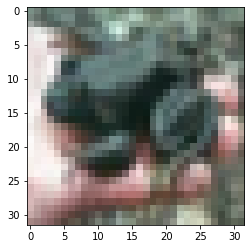

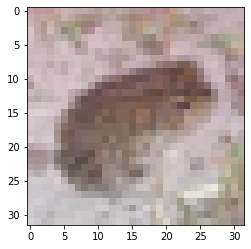

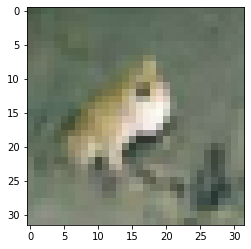

Class #7


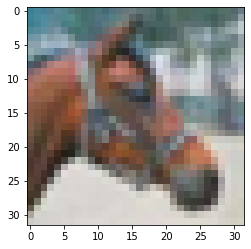

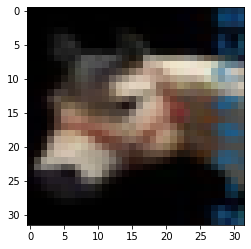

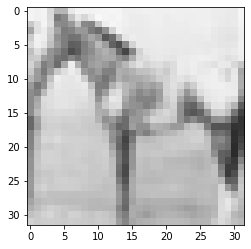

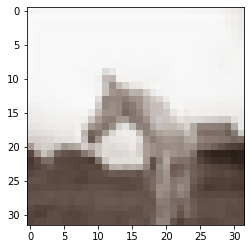

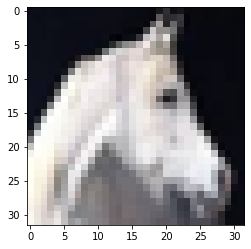

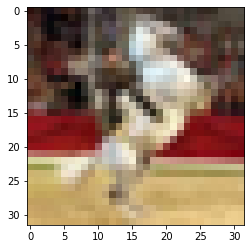

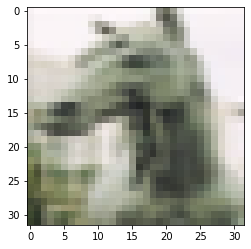

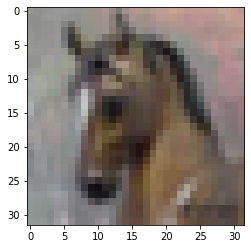

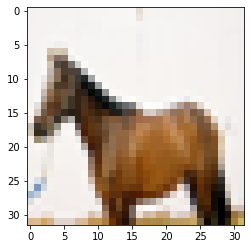

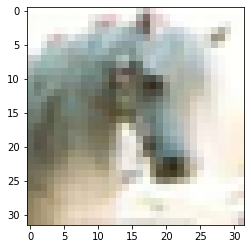

Class #8


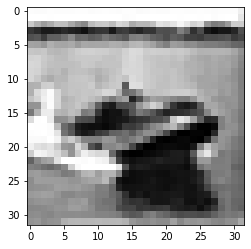

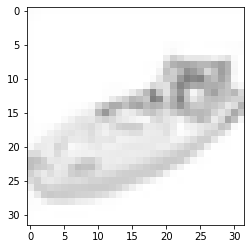

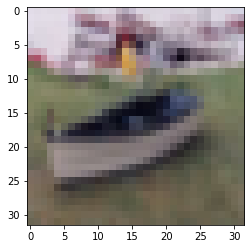

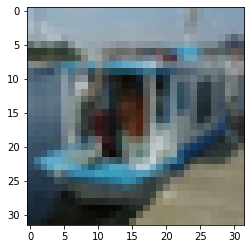

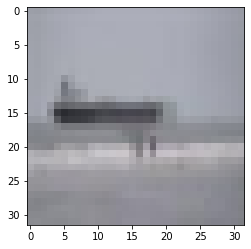

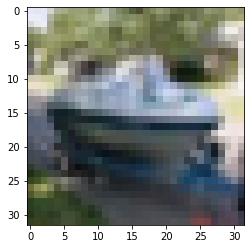

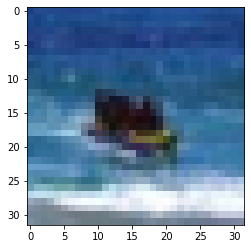

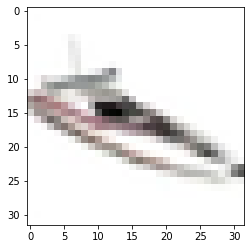

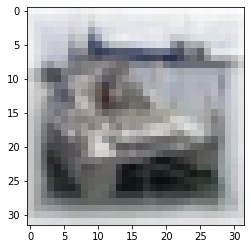

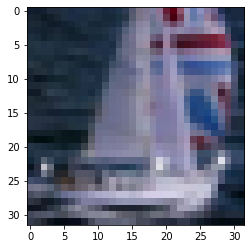

Class #9


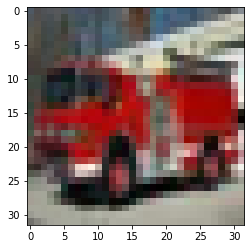

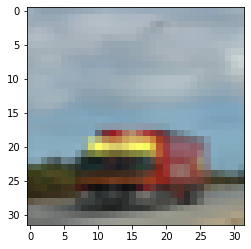

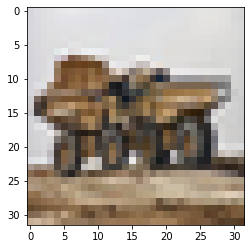

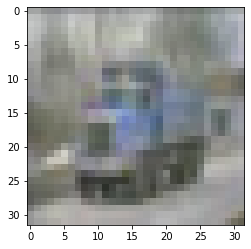

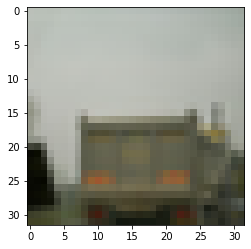

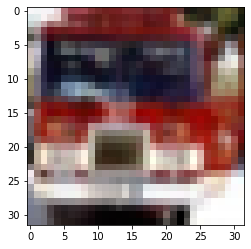

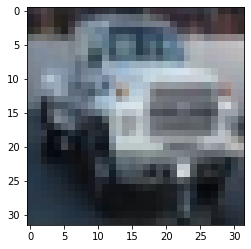

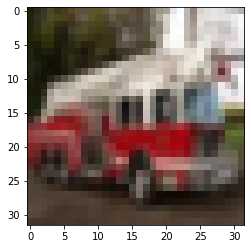

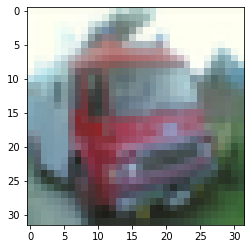

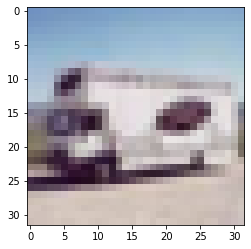

In [ ]:
#create 10 empty list positions 
misclassified = [[],[],[],[],[],[],[],[],[],[]]

for images, labels in test_loader:
  images = images.requires_grad_()
  outputs = model_A10(images)
  _, predicted = torch.max(outputs.data, 1)
  for i in range(len(predicted)):
    if (predicted[i] != labels[i]):
      wrong_img = images[i].detach().numpy()
      #change to transpose for images (from MNIST)
      wrong_img = np.transpose(wrong_img, (1, 2, 0))
      misclassified[labels[i]].append(wrong_img)

print('Misclassified images grouped by actual label:')
for i in range(10):
  print('Class #' + str(i))
  for j in range(10):
    plt.imshow(misclassified[i][j])
    plt.show()

**(c) Calculate total number of trainable parameters in all models, i.e, total number
of weights, biases.**

Note: This part was written out on purpose instead of using the suggested way of the pytorch forum @ https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325/9 because I wanted the parameters to be written out clearly and in order. 

In [ ]:
def total_parameters(model):
  p0 = list(model.parameters())[0].size()
  p1 = list(model.parameters())[1].size()
  p2 = list(model.parameters())[2].size()
  p3 = list(model.parameters())[3].size()
  p4 = list(model.parameters())[4].size()
  p5 = list(model.parameters())[5].size()
  
  p0total = p0[0] * p0[1] * p0[2] * p0[3]
  p2total = p2[0] * p2[1] * p2[2] * p2[3]
  p4total = p4[0] * p4[1]

  print('Convolution 1 = {} * {} * {} * {} = {}'.format(p0[0], p0[1], p0[2], p0[3], p0total))
  print('Convolution 1 Bias = {}'.format(p1[0]))
  print('Convolution 2 = {} * {} * {} * {} = {}'.format(p2[0], p2[1], p2[2], p2[3], p2total))
  print('Convolution 2 Bias = {}'.format(p3[0]))
  print('Fully Connected Layer = {} * {} = {}'.format(p4[0], p4[1], p4total))
  print('Fully Connected Layer Bias = {}\n'.format(p5[0]))

  print('Total Trainable Parameters = {} + {} + {} + {} + {} + {} = {}\n\n'.format(p0total, p1[0], p2total, p3[0], p4total, p5[0], p0total + p1[0] + p2total + p3[0] + p4total + p5[0]))


In [ ]:
total_parameters(model_A10)
total_parameters(model_A25)
total_parameters(model_A50)

total_parameters(model_B10)
total_parameters(model_B25)
total_parameters(model_B50)

total_parameters(model_C10)
total_parameters(model_C25)
total_parameters(model_C50)

Convolution 1 = 16 * 3 * 5 * 5 = 1200
Convolution 1 Bias = 16
Convolution 2 = 32 * 16 * 5 * 5 = 12800
Convolution 2 Bias = 32
Fully Connected Layer = 10 * 2048 = 20480
Fully Connected Layer Bias = 10

Total Trainable Parameters = 1200 + 16 + 12800 + 32 + 20480 + 10 = 34538


Convolution 1 = 16 * 3 * 5 * 5 = 1200
Convolution 1 Bias = 16
Convolution 2 = 32 * 16 * 5 * 5 = 12800
Convolution 2 Bias = 32
Fully Connected Layer = 10 * 2048 = 20480
Fully Connected Layer Bias = 10

Total Trainable Parameters = 1200 + 16 + 12800 + 32 + 20480 + 10 = 34538


Convolution 1 = 16 * 3 * 5 * 5 = 1200
Convolution 1 Bias = 16
Convolution 2 = 32 * 16 * 5 * 5 = 12800
Convolution 2 Bias = 32
Fully Connected Layer = 10 * 2048 = 20480
Fully Connected Layer Bias = 10

Total Trainable Parameters = 1200 + 16 + 12800 + 32 + 20480 + 10 = 34538


Convolution 1 = 16 * 3 * 5 * 5 = 1200
Convolution 1 Bias = 16
Convolution 2 = 32 * 16 * 5 * 5 = 12800
Convolution 2 Bias = 32
Fully Connected Layer = 10 * 2048 = 20480
Full